In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [2]:
df=pd.read_csv('/Users/denisdunn/Downloads/conflicts.csv')

In [3]:
#df=df[df['FatalPre']<7000]

In [4]:
#changed the prediction column into binary for classification
action=[]
for num in df['Action']:
    if num >7:
        action.append(1)
    else:
        action.append(0)

In [5]:
y=df['Action']=action

In [6]:
#changed countries with na imports and exports to be the same 1 was looking for the difference
df['imports'] = df['imports'].fillna(1)

In [7]:
df['exports']=df['exports'].fillna(1)

In [8]:
# negative 9 was an uknown number, gave it zero instead of deleting
df['FatalPre'].replace(-9,0)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8100    0
8101    0
8102    0
8103    0
8104    0
8105    0
8106    1
8107    0
8108    0
8109    0
8110    0
8111    0
8112    0
8113    0
8114    0
8115    0
8116    0
8117    0
8118    0
8119    0
8120    0
8121    0
8122    0
8123    3
8124    0
8125    0
8126    0
8127    0
8128    0
8129    0
Name: FatalPre, Length: 8130, dtype: int64

In [9]:
df.isna().sum()

Unnamed: 0        0
StAbb             0
CCode             0
Fatality          0
FatalPre          0
Action            0
HostLev           0
year              0
milex             0
milper            0
irst              0
pec               0
tpop              0
upop              0
cinc              0
imports           0
exports           0
us_dips           0
US_Allied         0
Russian_Allied    0
China_Allied      0
dtype: int64

In [10]:
#columns i am using for the analysis
X=df[[  'Fatality', 'FatalPre', 'year', 'milex', 'milper', 'irst', 'pec', 'tpop',
       'upop', 'cinc', 'imports', 'exports', 'us_dips', 'US_Allied',
       'Russian_Allied', 'China_Allied']]

In [64]:
#clean data set, 8130 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8130 entries, 0 to 8129
Data columns (total 21 columns):
Unnamed: 0        8130 non-null int64
StAbb             8130 non-null object
CCode             8130 non-null int64
Fatality          8130 non-null int64
FatalPre          8130 non-null int64
Action            8130 non-null int64
HostLev           8130 non-null int64
year              8130 non-null int64
milex             8130 non-null int64
milper            8130 non-null int64
irst              8130 non-null int64
pec               8130 non-null int64
tpop              8130 non-null float64
upop              8130 non-null float64
cinc              8130 non-null float64
imports           8130 non-null float64
exports           8130 non-null float64
us_dips           8130 non-null int64
US_Allied         8130 non-null int64
Russian_Allied    8130 non-null int64
China_Allied      8130 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.3+ MB


In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8130 entries, 0 to 8129
Data columns (total 16 columns):
Fatality          8130 non-null int64
FatalPre          8130 non-null int64
year              8130 non-null int64
milex             8130 non-null int64
milper            8130 non-null int64
irst              8130 non-null int64
pec               8130 non-null int64
tpop              8130 non-null float64
upop              8130 non-null float64
cinc              8130 non-null float64
imports           8130 non-null float64
exports           8130 non-null float64
us_dips           8130 non-null int64
US_Allied         8130 non-null int64
Russian_Allied    8130 non-null int64
China_Allied      8130 non-null int64
dtypes: float64(5), int64(11)
memory usage: 1016.3 KB


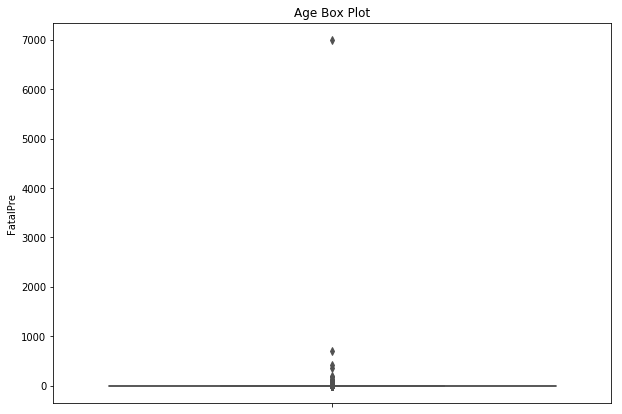

In [12]:
#plot a few boxplots to look for outliers
# went through each column, military exependiture was the biggest outlier
plt.figure(figsize = (10,7))
sns.boxplot(y = 'FatalPre', data = df, palette= 'GnBu_d').set_title('Age Box Plot')
plt.show() 

,Fatality,FatalPre,year,milex,milper,irst,pec,tpop,upop,cinc,imports,exports,us_dips,US_Allied,Russian_Allied,China_Allied
count,8130.000000,8130.000000,8130.000000,8.130000e+03,8130.000000,8130.000000,8.130000e+03,8.130000e+03,8130.000000,8.130000e+03,8.130000e+03,8.130000e+03,8130.000000,8130.000000,8130.000000,8130.000000
mean,-0.592374,0.496064,1999.813161,2.691434e+07,404.269373,17406.757442,3.397341e+05,1.039688e+05,29276.349815,2.058212e-02,1.207995e+05,1.018185e+05,0.947355,0.289914,0.147970,0.057565
std,2.415687,78.426929,4.748765,8.308810e+07,532.839247,45209.523490,7.790313e+05,2.512449e+05,67425.400151,3.947755e-02,2.987533e+05,2.212241e+05,0.223337,0.453750,0.355093,0.232933
min,-9.000000,-9.000000,1992.000000,-9.000000e+00,-9.000000,0.000000,1.500000e+01,1.900000e+01,0.000000,6.900000e-07,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1996.000000,4.940000e+05,58.000000,0.000000,1.334900e+04,6.239000e+03,2055.000000,1.420100e-03,1.852826e+03,8.812741e+02,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1999.000000,2.687000e+06,185.000000,331.000000,3.630000e+04,2.060700e+04,4924.000000,4.391100e-03,1.304854e+04,1.101840e+04,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2003.000000,1.132100e+07,515.000000,14313.000000,1.685710e+05,6.604225e+04,25304.000000,1.434400e-02,5.667704e+04,6.745580e+04,1.000000,1.000000,0.000000,0.000000
max,6.000000,7000.000000,2010.000000,6.936000e+08,3030.000000,638743.000000,4.529730e+06,1.359821e+06,612933.000000,2.081897e-01,2.165981e+06,1.969663e+06,1.000000,1.000000,1.000000,1.000000


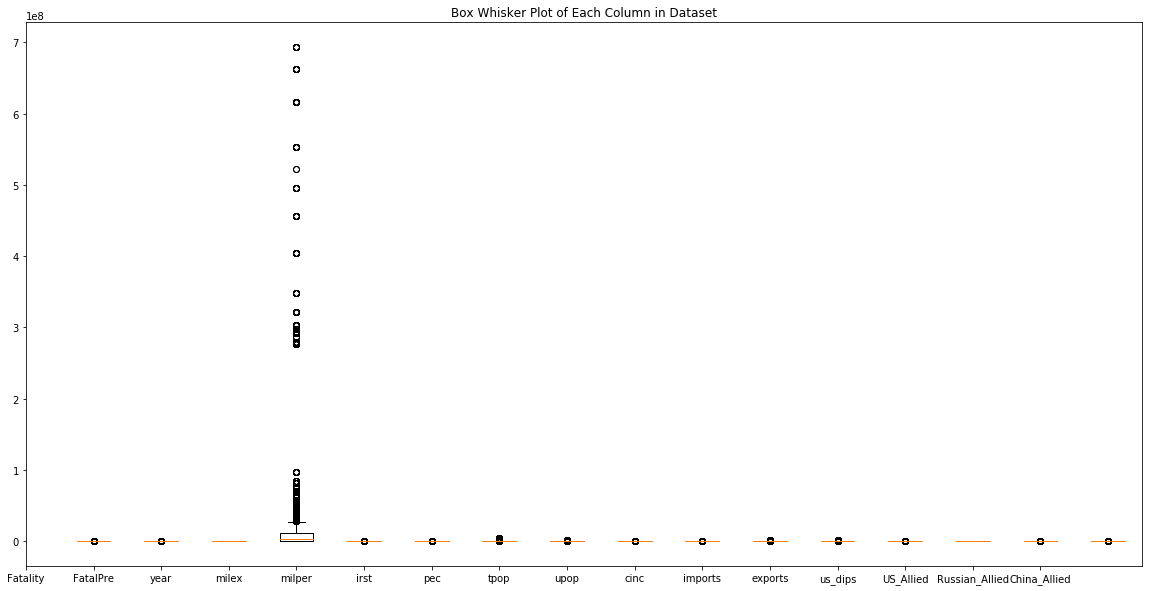

In [13]:
display(X.describe())

# Create a Box Whisker Plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([X[col] for col in X.columns])
plt.title("Box Whisker Plot of Each Column in Dataset")
plt.xticks(range(len(X.columns.values)), X.columns.values)
plt.show()

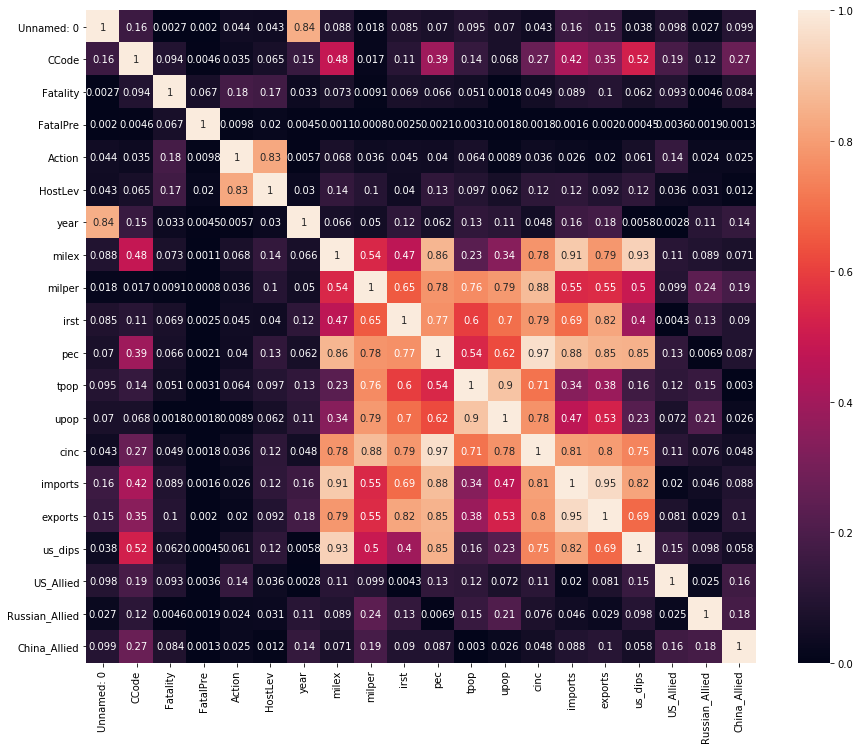

In [14]:
#check for corrleations
#looks pretty good with correaltions
plt.figure(figsize = (15,12))
sns.heatmap(df.corr().abs(), annot = True)

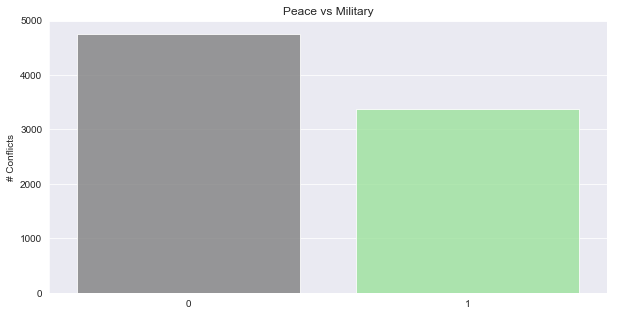

In [15]:
#checked the class imbalance of the action columns
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(y, alpha =.80, palette= ['grey','lightgreen'])
plt.title('Peace vs Military')
plt.ylabel('# Conflicts')
plt.show()

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:

# setting up testing and training sets
# ran the smote to take care of class imbalance. Default test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sm = SMOTE( ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [18]:
#print(y.value_counts()) #Previous original class distribution
#X_train, y_train = SMOTE().fit_sample(X_train, y_train) 
#print(pd.Series(y_train).value_counts())

In [19]:
# went with MinMax after eda

sc=MinMaxScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [20]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [21]:
# Create regularization penalty space
#ran a lasso and ridge regulation
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10,]
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [22]:
# Create grid search using 5-fold cross validation
# did a gridsearch on the logistic regression, with a kfold of 5 and i scored it with f1score
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

In [23]:
#fit logistical grid search model
model = clf_gs.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [24]:
#View best parameters
#ridge regression was the best
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.01


In [98]:
#from sklearn import metrics
#first run through got my a .53 f1 score
y_pred_train = model.best_estimator_.predict(X_train_scaled)
y_pred_test = model.best_estimator_.predict(X_test_scaled)
# Model Accuracy, how often is the classifier correct?
#print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Logistic Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))
print('logistic Accuracy Score:',accuracy_score(y_test, y_pred_test))

Logistic Testing F1 Score: 0.5917570498915401
logistic Accuracy Score: 0.5371372356123955


In [26]:
from sklearn.metrics import confusion_matrix
#initial confusion matrix
cnf_matrix = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[410 197]
 [744 682]]


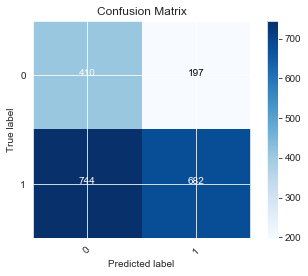

In [27]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [28]:
feature_cols = X.columns

In [29]:
 #Sort features importances in descending order

model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

model_params.sort(key = lambda x: abs(x[1]), reverse=True)
model_params

[('Fatality', -0.5389837131065779),
 ('US_Allied', -0.48462677448462527),
 ('milex', 0.18929001037693494),
 ('tpop', 0.17253998108736934),
 ('China_Allied', 0.16963788146745684),
 ('irst', -0.14149069400213388),
 ('year', 0.10939803607978318),
 ('Russian_Allied', 0.09496134021764499),
 ('upop', -0.08268606409803415),
 ('imports', 0.08156863145627413),
 ('exports', -0.08089486432410457),
 ('pec', 0.06945424535978431),
 ('cinc', 0.02978694108915612),
 ('milper', 0.028841950922088543),
 ('us_dips', 0.0268518331241217),
 ('FatalPre', 0.0052236082420937585)]

NameError: name 'names' is not defined

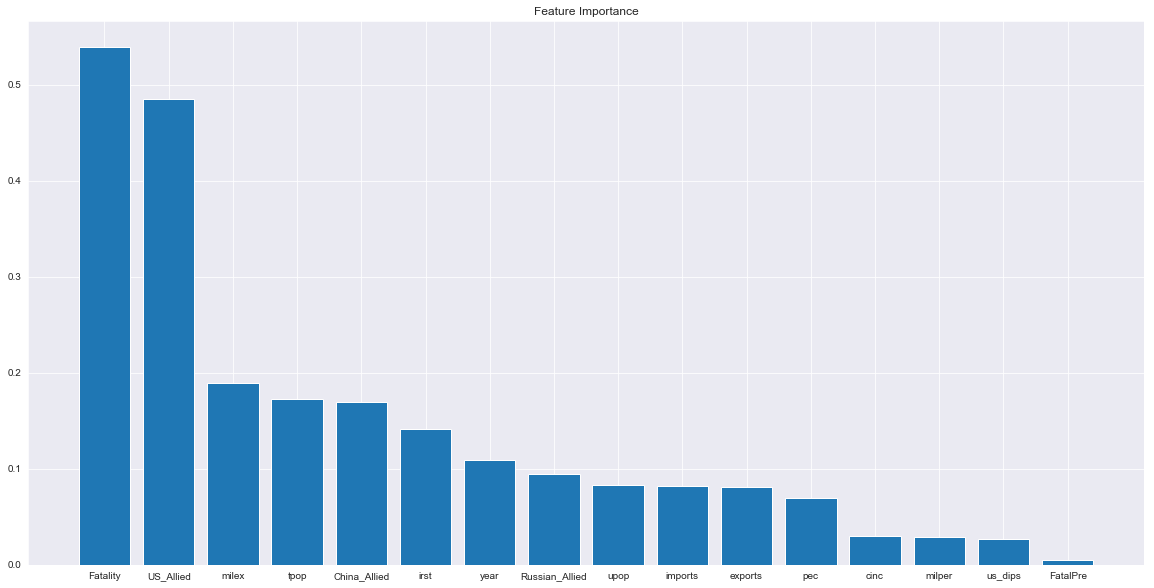

In [30]:

%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure(figsize = (20, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), rotation=90)

# Show plot
plt.show("PuBuGn_d")

In [31]:
#increased max_depth to 10 and got a .69 test score, gini was 1 point better than entropy
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
#f1 score improved greatly, overfit a little
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.7871313672922251
Testing F1 Score: 0.7082002129925453


In [32]:
# I tried bagging the decision tree to fight against overfitting, and tried different hyper parameters
# i tried both gini and entropy (same) and i found that gini was better scoring. gini(misclassification)/entropy(purity) 
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=9), n_estimators=200)

In [33]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [34]:
# bumped my accuracy score up to 80, with max_depth 9 and n estimators 200
bagged_tree.score(X_train, y_train)

0.8039433490697029

In [35]:
bagged_tree.score(X_test, y_test)

0.7393015248401378

In [36]:
bagpred=bagged_tree.predict(X_test)

In [37]:
#my highest f1 score was the bagged decision tree, .74 
#differs slightly from random forest in that it doesnt take out a variable to build the trees
#slight higher variance than random forest

print(classification_report(y_test, bagpred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1154
           1       0.69      0.73      0.71       879

   micro avg       0.74      0.74      0.74      2033
   macro avg       0.74      0.74      0.74      2033
weighted avg       0.74      0.74      0.74      2033



In [38]:
# predicted no conflict when there was one more than it predicted a conflict when there wasnt one
cnf_matrix = confusion_matrix(bagpred, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[857 233]
 [297 646]]


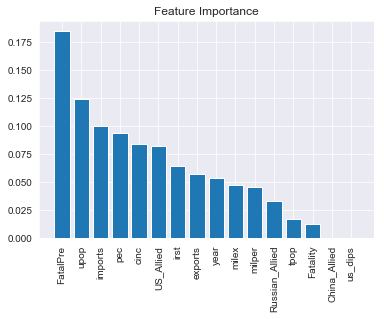

In [82]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_cols[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

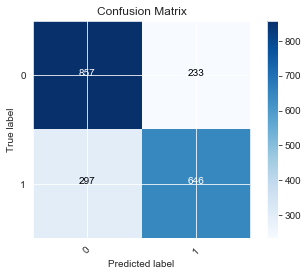

In [39]:
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [ ]:
#print(classification_report(y_test, predict))

In [99]:
#random Forest tried different hyperparameters
forest = RandomForestClassifier(n_estimators=500, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
#accuracy score
forest.score(X_train, y_train)

0.7352124409886143

In [101]:
#accuracy score not overfit
forest.score(X_test, y_test)

0.7151992129857354

In [102]:
forpred=forest.predict(X_test)

In [103]:
#slight worse f1score than the bagged decision tree but that doesnt tell whole story
print(classification_report(y_test, forpred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1154
           1       0.69      0.61      0.65       879

   micro avg       0.72      0.72      0.72      2033
   macro avg       0.71      0.70      0.71      2033
weighted avg       0.71      0.72      0.71      2033



In [104]:
#better confusion matrix breakdown, only 238 predicted for no conflict when there was one
cnf_matrix = confusion_matrix(forpred, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[916 341]
 [238 538]]


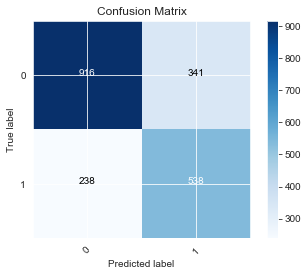

In [105]:
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [40]:
# tried a different random forest with max features, wasnt as good
forest_2 = RandomForestClassifier(n_estimators = 500, max_features= 4, max_depth= 5)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
predict=forest_2.predict(X_test)

In [42]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1154
           1       0.70      0.59      0.64       879

   micro avg       0.72      0.72      0.72      2033
   macro avg       0.71      0.70      0.70      2033
weighted avg       0.72      0.72      0.71      2033



In [43]:
rf_tree_1 = forest_2.estimators_[0]

In [44]:
# Calculate feature importances
importances = clf.feature_importances_

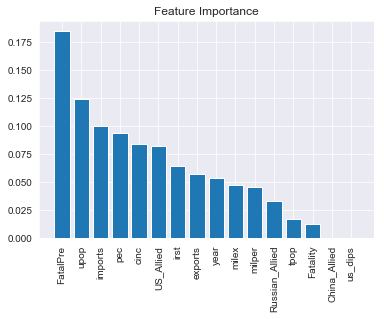

In [45]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_cols[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [46]:
#we are running a pipeline of logistical regression and polynomial features
pipe_lr_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
            ('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

In [47]:
#penalties and liblinear solver
#liblinear supporst but l1 and l2 regulation
penalty_param_range = [ 0.5, 0.1, .01,.001]
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': penalty_param_range,
        'clf__solver': ['liblinear']}] 

In [48]:
#grid search of the pipeline f1 score, 5 folds
gs_lr_poly = GridSearchCV(estimator=pipe_lr_poly,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=5)

In [49]:
#fitts the gridsearchcv
gs_lr_poly.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sco

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'clf__penalty': ['l1', 'l2'], 'clf__C': [0.5, 0.1, 0.01, 0.001], 'clf__solver': ['liblinear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [50]:
# Best params
print('Best params: %s' % gs_lr_poly.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_lr_poly.best_score_)
# Predict on test data with best params
y_pred = gs_lr_poly.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.703
Test set F1 score for best params: 0.676 


In [59]:
#Decision Tree, tested entory and differnt parameters. didnt help my scoring
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',
                           max_depth=10,
                           min_samples_split=10,
                           min_samples_leaf= 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
from sklearn.metrics import roc_curve,auc

In [ ]:
# Make predictions using test set 
#checked out the roc(probability), auc is the sensitivity (better at predicting)
y_pred = dt.predict(X_test)
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [54]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [60]:
#ran a grid search on the decision tree to see where the best hyper parameters are
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [61]:
gridpred=dt_grid_search.predict(X_test)

In [62]:
#had a solid f1score of .73
print(classification_report(y_test, gridpred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1154
           1       0.69      0.67      0.68       879

   micro avg       0.73      0.73      0.73      2033
   macro avg       0.72      0.72      0.72      2033
weighted avg       0.73      0.73      0.73      2033



In [67]:
#tried different hyperparameters
GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
dt.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [95]:
#KNN tests
#nearest neighbors didnt perform as well
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=10 , p = 20) 
clf1.fit(X_train, y_train)
test_preds = clf1.predict(X_test)
test=f1_score(y_test,test_preds)
test_acc = accuracy_score(y_test, test_preds)
print("KNN_Accuracy: %f" % (test_acc))
print("KNN_F1score: %f" % (test))

KNN_Accuracy: 0.706345
KNN_F1score: 0.653109


In [70]:
# wanted to try adaboost and gradient boosting to improve scoring
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [71]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [72]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [73]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [74]:
#my training scores were the best out of all models but testing scores slightly worse
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7357678422660372
F1-Score: 0.7255156497908554

Model: Gradient Boosted Trees
Accuracy: 0.7731185781727298
F1-Score: 0.7688172043010754

Testing Metrics
Model: AdaBoost
Accuracy: 0.7171667486473192
F1-Score: 0.6719908727895038

Model: Gradient Boosted Trees
Accuracy: 0.7388096409247418
F1-Score: 0.6998304126625211


In [75]:
# tried xgboost
import xgboost as xgb
import xgboost as XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [76]:
#xgboost model colsamply is amount of data per tree. alpha is l1 penalty. eta helps prevent overfitting makes boosting more conservative
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 10, alpha = 0, n_estimators = 200,subsample=.6,eta=.01)

In [77]:
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [78]:
X_test = X_test.as_matrix()
X_train = X_train.as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [79]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, eta=0.01, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)

In [88]:
clf = xgb.XGBClassifier(subsample=.01,learning_rate=.5,n_estimators=900)
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 69.54%
Validation accuracy: 65.72%


In [91]:
xgpreds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("XGBoost_Accuracy: %f" % (test_acc))
print("XGBoost_F1score: %f" % (test_f1))

XGBoost_Accuracy: 0.737334
XGBoost_F1score: 0.703333


In [85]:
xgpreds = xg_clf.predict(X_test)
knn_preds = clf1.predict(X_test)
y_pred_train = model.best_estimator_.predict(X_train_scaled)
log_pred_test = model.best_estimator_.predict(X_test_scaled)

In [87]:
#work in progress
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, xgpreds, model_name='XGBoost')
print("")
display_acc_and_f1_score(y_train, knn_preds, model_name='KNN')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, xgpreds, model_name='XGBoost')
print("")
display_acc_and_f1_score(y_test, knn_preds, model_name='KNN')

Training Metrics


ValueError: Found input variables with inconsistent numbers of samples: [7202, 2033]

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
params = {'objective':'binary:logistic','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10.0}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

In [ ]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg
#     feat_imp = pd.Series(alg.get_booster().get_fscore())
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [ ]:
grid_clf = GridSearchCV(clf, params, scoring='accuracy', cv=3, n_jobs=1)
grid_clf.fit(scaled_df, labels)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
alg.feature_importances_

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
gsearch1.best_params_

In [ ]:
preds = gsearch1.best_estimator_.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

In [ ]:

# plot feature importance
plot_importance(alg)
pyplot.show()

In [ ]:
from xgboost import plot_importance

In [ ]:
alg.get_booster().get_fscore()

In [ ]:
import pickle

In [ ]:
# pickle list object
 
model_pickle_path = 'xg_boost_model.pkl'

# Create an variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(xg_clf, model_pickle)
model_pickle.close()

In [ ]:
# Loading the saved XGboost model pickle
xgboost_model_pkl = open(model_pickle_path, 'rb')
xgboost_model = pickle.load(xgboost_model_pkl)
print("Loaded XGboost model :: ", xgboost_model)

In [ ]:
xgboost_model.head()

In [ ]:
#work in progress
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))